# Portfolio Optimization using Deep Reinforcement Learning
---

## 7.0 Uniform Weights and Maximum Sharpe Strategies
---
We present two allocation strategies which will be used for comparision with the proposed Deep Reinforcement Learning (DRL) methodology.

The two strategies are:

1. Uniform Weights Strategy. This is a naive method where the weights of the assets are distributed equally among the assets in the portfolio.

2. Maximum Sharpe Strategy. This is an optimization strategy where the allocation is based on achieving the maximum possible risk based return (Sharpe Ratio). We will make use of the PyPotfolioOpt Library which is a library that implements portfolio optimisation methods.

### 7.1 Import Relevant Packages

In [1]:
pip install finrl

  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to /private/var/folders/3z/6b2hp23s5sg2j9x4jt4hyh_80000gn/T/pip-install-g3v2uzh8/elegantrl_83820fc6d56945d6a9cff53a116160a9
  Running command git clone --quiet https://github.com/AI4Finance-Foundation/ElegantRL.git /private/var/folders/3z/6b2hp23s5sg2j9x4jt4hyh_80000gn/T/pip-install-g3v2uzh8/elegantrl_83820fc6d56945d6a9cff53a116160a9
  Resolved https://github.com/AI4Finance-Foundation/ElegantRL.git to commit b64df20f552477f24ec50c3e5088c1e241fdc455
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pylab as plt
from IPython.display import display, HTML
from datetime import datetime

In [3]:
import pypfopt

In [4]:
from pypfopt.efficient_frontier import efficient_frontier
from pypfopt.efficient_frontier.efficient_frontier import EfficientFrontier
from pypfopt import objective_functions
from pypfopt import risk_models
from pypfopt import expected_returns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### 7.2 Load the Train and Test Data for Close Prices

In [5]:
%store -r prices_full_train_df
%store -r prices_full_test_df

In [6]:
prices_train_df = prices_full_train_df.copy()
prices_test_df = prices_full_test_df.copy()

In [7]:
prices_train_df = prices_train_df.reset_index(drop=True).set_index(['date'])
prices_test_df = prices_test_df.reset_index(drop=True).set_index(['date'])

In [8]:
prices_train_df.head()

,BRITANNIA.NS,AXISBANK.NS,TATASTEEL.NS,HEROMOTOCO.NS,TATACONSUM.NS,HDFCLIFE.NS,GRASIM.NS,JSWSTEEL.NS,BAJAJ-AUTO.NS,NTPC.NS,...,BHARTIARTL.NS,NESTLEIND.NS,APOLLOHOSP.NS,BAJFINANCE.NS,INFY.NS,ONGC.NS,SUNPHARMA.NS,POWERGRID.NS,INDUSINDBK.NS,BAJAJFINSV.NS
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,2387.000000,569.799988,70.064255,3810.000000,317.799988,399.799988,1165.166992,271.700012,3345.050049,147.791672,...,484.966522,790.159973,1216.000000,1760.000000,522.250000,195.699997,585.400024,113.484406,1655.949951,530.875000
2018-01-02,2371.125000,568.599976,69.668869,3784.350098,314.950012,398.000000,1149.529175,268.000000,3348.000000,149.375000,...,480.279999,792.304993,1212.000000,1739.699951,521.000000,197.500000,582.000000,113.512527,1647.000000,522.900024
2018-01-03,2354.975098,565.450012,70.264328,3764.399902,315.149994,398.299988,1144.798096,272.250000,3310.199951,150.250000,...,473.610687,793.500000,1203.949951,1738.349976,515.799988,197.399994,578.950012,113.878151,1650.000000,517.979980
2018-01-04,2344.449951,565.000000,72.736679,3759.949951,313.500000,401.950012,1170.844482,281.899994,3274.250000,148.250000,...,475.142822,790.219971,1188.449951,1758.250000,510.500000,200.000000,583.950012,114.103149,1652.500000,513.500000
2018-01-05,2339.750000,566.000000,74.018112,3758.699951,315.850006,412.000000,1214.172241,289.899994,3294.000000,148.541672,...,488.932068,788.400024,1199.000000,1821.000000,513.200012,200.949997,587.349976,113.653152,1703.000000,514.494995


In [9]:
prices_test_df.head()

,BRITANNIA.NS,AXISBANK.NS,TATASTEEL.NS,HEROMOTOCO.NS,TATACONSUM.NS,HDFCLIFE.NS,GRASIM.NS,JSWSTEEL.NS,BAJAJ-AUTO.NS,NTPC.NS,...,BHARTIARTL.NS,NESTLEIND.NS,APOLLOHOSP.NS,BAJFINANCE.NS,INFY.NS,ONGC.NS,SUNPHARMA.NS,POWERGRID.NS,INDUSINDBK.NS,BAJAJFINSV.NS
date,,,,,,,,,,,,,,,,,,,,,
2023-02-16,4617.899902,874.299988,112.199997,2590.000000,735.500000,522.000000,1636.194092,731.450012,3930.949951,167.699997,...,790.500000,1979.984985,4668.000000,6524.750000,1614.449951,156.449997,1010.000000,162.675003,1156.099976,1435.000000
2023-02-17,4588.000000,868.250000,113.099998,2539.100098,734.799988,514.549988,1662.190796,735.900024,3920.000000,169.649994,...,787.450012,1957.505005,4668.950195,6475.799805,1595.000000,158.800003,996.500000,161.925003,1143.900024,1427.199951
2023-02-20,4545.000000,861.200012,112.699997,2544.500000,729.450012,522.750000,1643.764038,733.000000,3934.949951,170.000000,...,793.799988,1914.500000,4649.950195,6443.549805,1603.000000,157.800003,991.650024,162.750000,1122.800049,1425.800049
2023-02-21,4527.850098,849.000000,114.199997,2545.000000,730.000000,514.799988,1652.329956,736.000000,3927.000000,174.250000,...,788.000000,1893.380005,4640.000000,6408.250000,1601.650024,155.899994,990.799988,164.062500,1112.150024,1409.400024
2023-02-22,4540.899902,843.000000,113.699997,2534.649902,734.000000,501.750000,1627.777588,723.250000,3890.250000,173.199997,...,781.650024,1888.280029,4535.950195,6360.000000,1575.000000,154.500000,978.000000,162.975006,1096.949951,1392.000000


### 7.3 Uniform Weights Portfolio

In [10]:
# Define a Function for Displaying the Cleaned Weights
def show_clean_p(port_df):
    p1_show_1 = (port_df.transpose()[0]).map(lambda x: "{:.3%}".format(x)).to_frame().transpose()
    return display(HTML(p1_show_1.to_html()))

In [11]:
ticker_list = list(prices_train_df.columns) # Get List of all ticker symbols
n_assets = len(ticker_list) # Number of assets

uniform_weights = np.ones((n_assets))/n_assets

uniform_weights_port = pd.DataFrame([uniform_weights], columns = ticker_list)

print("\nuniform weights portfolio:\n")
show_clean_p(uniform_weights_port)


uniform weights portfolio:



,BRITANNIA.NS,AXISBANK.NS,TATASTEEL.NS,HEROMOTOCO.NS,TATACONSUM.NS,HDFCLIFE.NS,GRASIM.NS,JSWSTEEL.NS,BAJAJ-AUTO.NS,NTPC.NS,SBIN.NS,M&M.NS,HCLTECH.NS,SHRIRAMFIN.NS,ADANIENT.NS,DRREDDY.NS,ITC.NS,LTIM.NS,ADANIPORTS.NS,COALINDIA.NS,TITAN.NS,EICHERMOT.NS,ICICIBANK.NS,BPCL.NS,SBILIFE.NS,HDFCBANK.NS,LT.NS,HINDALCO.NS,CIPLA.NS,DIVISLAB.NS,ASIANPAINT.NS,TATAMOTORS.NS,TCS.NS,KOTAKBANK.NS,MARUTI.NS,TECHM.NS,HINDUNILVR.NS,RELIANCE.NS,WIPRO.NS,ULTRACEMCO.NS,BHARTIARTL.NS,NESTLEIND.NS,APOLLOHOSP.NS,BAJFINANCE.NS,INFY.NS,ONGC.NS,SUNPHARMA.NS,POWERGRID.NS,INDUSINDBK.NS,BAJAJFINSV.NS
0,2.000%,2.000%,2.000%,2.000%,2.000%,2.000%,2.000%,2.000%,2.000%,2.000%,2.000%,2.000%,2.000%,2.000%,2.000%,2.000%,2.000%,2.000%,2.000%,2.000%,2.000%,2.000%,2.000%,2.000%,2.000%,2.000%,2.000%,2.000%,2.000%,2.000%,2.000%,2.000%,2.000%,2.000%,2.000%,2.000%,2.000%,2.000%,2.000%,2.000%,2.000%,2.000%,2.000%,2.000%,2.000%,2.000%,2.000%,2.000%,2.000%,2.000%


In [12]:
uniform_weights

array([0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02])

In [13]:
# Plotting the Daily Draw Down

ticker_symb = ['LTIM.NS']
prices = prices_train_df[ticker_symb]
window = 250

def get_daily_max_drawdown(prices, window):
    max_rolling = prices.rolling(min_periods=1, window=window).max()
    daily_drawdown = (prices / max_rolling) - 1
    max_daily_drawdown = daily_drawdown.rolling(min_periods=1, window=window).min()
    return daily_drawdown,max_daily_drawdown

max_rolling = prices.rolling(min_periods=1, window=window).max()

daily_drawdown, max_daily_drawdown = get_daily_max_drawdown(prices, window)
daily_drawdown.name = "{} daily drawdown".format(ticker_symb) 
#daily_drawdown = pd.DataFrame(daily_drawdown)

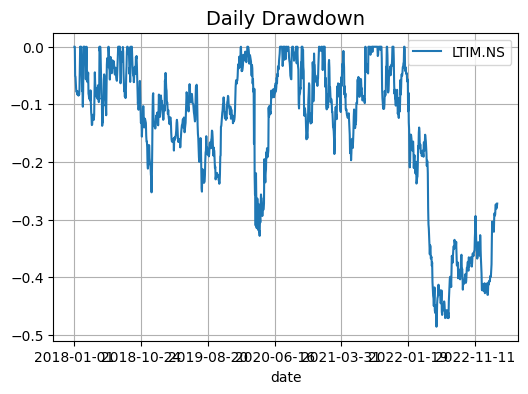

In [14]:
fig, ax = plt.subplots(figsize=(6,4))
daily_drawdown.plot(ax=ax);
ax.set_title("Daily Drawdown", fontsize=14)
plt.legend(loc="best");
plt.grid(True)
plt.show()

fig.savefig('results/daily_drawdown.png');

In [15]:
prices_train_df.columns

Index(['BRITANNIA.NS', 'AXISBANK.NS', 'TATASTEEL.NS', 'HEROMOTOCO.NS',
       'TATACONSUM.NS', 'HDFCLIFE.NS', 'GRASIM.NS', 'JSWSTEEL.NS',
       'BAJAJ-AUTO.NS', 'NTPC.NS', 'SBIN.NS', 'M&M.NS', 'HCLTECH.NS',
       'SHRIRAMFIN.NS', 'ADANIENT.NS', 'DRREDDY.NS', 'ITC.NS', 'LTIM.NS',
       'ADANIPORTS.NS', 'COALINDIA.NS', 'TITAN.NS', 'EICHERMOT.NS',
       'ICICIBANK.NS', 'BPCL.NS', 'SBILIFE.NS', 'HDFCBANK.NS', 'LT.NS',
       'HINDALCO.NS', 'CIPLA.NS', 'DIVISLAB.NS', 'ASIANPAINT.NS',
       'TATAMOTORS.NS', 'TCS.NS', 'KOTAKBANK.NS', 'MARUTI.NS', 'TECHM.NS',
       'HINDUNILVR.NS', 'RELIANCE.NS', 'WIPRO.NS', 'ULTRACEMCO.NS',
       'BHARTIARTL.NS', 'NESTLEIND.NS', 'APOLLOHOSP.NS', 'BAJFINANCE.NS',
       'INFY.NS', 'ONGC.NS', 'SUNPHARMA.NS', 'POWERGRID.NS', 'INDUSINDBK.NS',
       'BAJAJFINSV.NS'],
      dtype='object')

In [16]:
# Using the average daily return to calculate portfolio return

returns = prices_train_df.pct_change() # get the assets daily returns
mean_daily_returns = returns.mean().values

uw_returns = np.dot(mean_daily_returns, uniform_weights)

print("uniform weights portfolio average daily return = {:.4%}".format(uw_returns))

uniform weights portfolio average daily return = 0.0644%


In [17]:
prices_train_df.head()

,BRITANNIA.NS,AXISBANK.NS,TATASTEEL.NS,HEROMOTOCO.NS,TATACONSUM.NS,HDFCLIFE.NS,GRASIM.NS,JSWSTEEL.NS,BAJAJ-AUTO.NS,NTPC.NS,...,BHARTIARTL.NS,NESTLEIND.NS,APOLLOHOSP.NS,BAJFINANCE.NS,INFY.NS,ONGC.NS,SUNPHARMA.NS,POWERGRID.NS,INDUSINDBK.NS,BAJAJFINSV.NS
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,2387.000000,569.799988,70.064255,3810.000000,317.799988,399.799988,1165.166992,271.700012,3345.050049,147.791672,...,484.966522,790.159973,1216.000000,1760.000000,522.250000,195.699997,585.400024,113.484406,1655.949951,530.875000
2018-01-02,2371.125000,568.599976,69.668869,3784.350098,314.950012,398.000000,1149.529175,268.000000,3348.000000,149.375000,...,480.279999,792.304993,1212.000000,1739.699951,521.000000,197.500000,582.000000,113.512527,1647.000000,522.900024
2018-01-03,2354.975098,565.450012,70.264328,3764.399902,315.149994,398.299988,1144.798096,272.250000,3310.199951,150.250000,...,473.610687,793.500000,1203.949951,1738.349976,515.799988,197.399994,578.950012,113.878151,1650.000000,517.979980
2018-01-04,2344.449951,565.000000,72.736679,3759.949951,313.500000,401.950012,1170.844482,281.899994,3274.250000,148.250000,...,475.142822,790.219971,1188.449951,1758.250000,510.500000,200.000000,583.950012,114.103149,1652.500000,513.500000
2018-01-05,2339.750000,566.000000,74.018112,3758.699951,315.850006,412.000000,1214.172241,289.899994,3294.000000,148.541672,...,488.932068,788.400024,1199.000000,1821.000000,513.200012,200.949997,587.349976,113.653152,1703.000000,514.494995


In [18]:
prices_train_df.dropna(inplace=True)

In [19]:
#Annualized Return, Variance and Standard Deviation

def get_annualized_return(prices, weights):
    months = (pd.to_datetime(prices.index[-1]) - pd.to_datetime(prices.index[0])).days / 30
    total_return = (prices.iloc[-1].dot(weights) - prices.iloc[0].dot(weights)) / prices.iloc[0].dot(weights)
    annualized_return = ((1 + total_return) ** (12 / months)) - 1
    return annualized_return

num_assets = len(prices_train_df.columns)
uniform_weights = np.ones(num_assets) / num_assets
uw_annual_return = get_annualized_return(prices_train_df, uniform_weights)

def get_portfolio_variance(returns, weigths):
    covariance_returns = returns.cov() * 250
    return np.dot(weigths.T, np.dot(covariance_returns, weigths))

uw_var = get_portfolio_variance(returns, uniform_weights)

print("uniform weights portfolio annualized return = {:.4%}".format(uw_annual_return))
print("uniform weights portfolio annualized variance = {:.1%}".format(uw_var))
print("uniform weights portfolio annualized std = {:.1%}".format(np.sqrt(uw_var)))

uniform weights portfolio annualized return = 10.6185%
uniform weights portfolio annualized variance = 2.5%
uniform weights portfolio annualized std = 15.9%


In [20]:
# Sharpe ratio

uniform_returns = returns.dot(uniform_weights)

rfr = 0.04 #Risk free rate

uw_vol = uniform_returns.std() * np.sqrt(250)

uw_sharpe_ratio = ((uw_annual_return  - rfr) / uw_vol)

print("uniform weights portfolio sharpe ratio = {:.2f}".format(uw_sharpe_ratio))

uniform weights portfolio sharpe ratio = 0.42


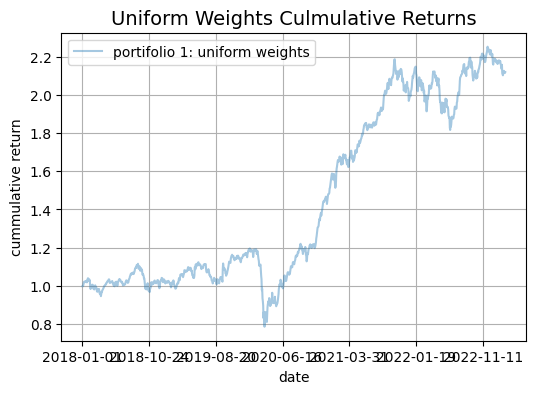

In [21]:
# Plotting the cummulative return
uniform_cum_returns = (1 + uniform_returns).cumprod()
uniform_cum_returns.name = "portifolio 1: uniform weights"

fig, ax = plt.subplots(figsize=(6,4))
uniform_cum_returns.plot(ax=ax, alpha=0.4);

plt.legend(loc="best");
plt.grid(True)
ax.set_ylabel("cummulative return");
ax.set_title('Uniform Weights Culmulative Returns', fontsize=14)

fig.savefig('results/uniform_weights_portfolio.png');

### 7.4 Maximum Sharpe Portfolio
---
We use PyPortfolioOpt library to get the weights for the Maximum Sharpe Portfolio

In [22]:
mu = expected_returns.mean_historical_return(prices_train_df)
Sigma = risk_models.sample_cov(prices_train_df)
ef = EfficientFrontier(mu,Sigma)
ef.add_objective(objective_functions.L2_reg, gamma=1)

raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
max_sharpe_portfolio = pd.DataFrame(cleaned_weights, index=[0])

print("max sharpe portfolio:")
show_clean_p(max_sharpe_portfolio)

_ = ef.portfolio_performance(verbose=True, risk_free_rate=rfr)

print()

max sharpe portfolio:


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


,BRITANNIA.NS,AXISBANK.NS,TATASTEEL.NS,HEROMOTOCO.NS,TATACONSUM.NS,HDFCLIFE.NS,GRASIM.NS,JSWSTEEL.NS,BAJAJ-AUTO.NS,NTPC.NS,SBIN.NS,M&M.NS,HCLTECH.NS,SHRIRAMFIN.NS,ADANIENT.NS,DRREDDY.NS,ITC.NS,LTIM.NS,ADANIPORTS.NS,COALINDIA.NS,TITAN.NS,EICHERMOT.NS,ICICIBANK.NS,BPCL.NS,SBILIFE.NS,HDFCBANK.NS,LT.NS,HINDALCO.NS,CIPLA.NS,DIVISLAB.NS,ASIANPAINT.NS,TATAMOTORS.NS,TCS.NS,KOTAKBANK.NS,MARUTI.NS,TECHM.NS,HINDUNILVR.NS,RELIANCE.NS,WIPRO.NS,ULTRACEMCO.NS,BHARTIARTL.NS,NESTLEIND.NS,APOLLOHOSP.NS,BAJFINANCE.NS,INFY.NS,ONGC.NS,SUNPHARMA.NS,POWERGRID.NS,INDUSINDBK.NS,BAJAJFINSV.NS
0,1.783%,0.000%,0.000%,0.000%,2.665%,0.000%,0.000%,3.224%,0.000%,0.000%,0.165%,0.843%,3.874%,0.000%,18.325%,2.172%,0.442%,6.764%,0.000%,0.000%,4.559%,0.000%,3.573%,0.000%,0.697%,0.979%,0.402%,0.000%,1.525%,4.029%,3.542%,0.000%,4.548%,0.982%,0.000%,2.198%,1.959%,3.953%,0.811%,0.137%,0.783%,3.997%,6.241%,5.240%,5.366%,0.000%,1.160%,0.220%,0.000%,2.839%


Expected annual return: 32.5%
Annual volatility: 18.5%
Sharpe Ratio: 1.65



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:441: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  warnings.warn(


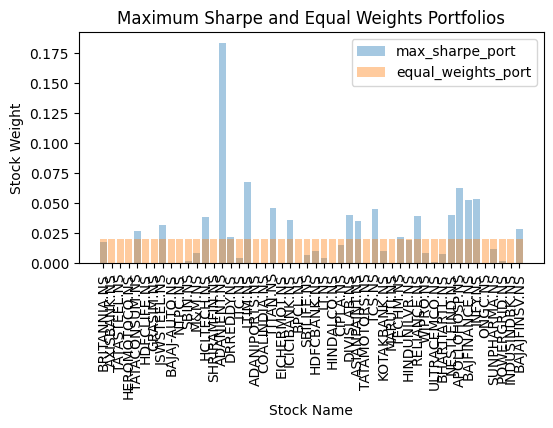

In [23]:
plt.subplots(figsize=(6,3))
plt.title('Maximum Sharpe and Equal Weights Portfolios')
plt.bar(max_sharpe_portfolio.T.index, max_sharpe_portfolio.T[0], alpha=0.4, label='max_sharpe_port')
plt.bar(uniform_weights_port.T.index, uniform_weights_port.T[0], alpha=0.4, label='equal_weights_port')
plt.xlabel('Stock Name')
plt.ylabel('Stock Weight')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [24]:
prices_train_df.head()

,BRITANNIA.NS,AXISBANK.NS,TATASTEEL.NS,HEROMOTOCO.NS,TATACONSUM.NS,HDFCLIFE.NS,GRASIM.NS,JSWSTEEL.NS,BAJAJ-AUTO.NS,NTPC.NS,...,BHARTIARTL.NS,NESTLEIND.NS,APOLLOHOSP.NS,BAJFINANCE.NS,INFY.NS,ONGC.NS,SUNPHARMA.NS,POWERGRID.NS,INDUSINDBK.NS,BAJAJFINSV.NS
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,2387.000000,569.799988,70.064255,3810.000000,317.799988,399.799988,1165.166992,271.700012,3345.050049,147.791672,...,484.966522,790.159973,1216.000000,1760.000000,522.250000,195.699997,585.400024,113.484406,1655.949951,530.875000
2018-01-02,2371.125000,568.599976,69.668869,3784.350098,314.950012,398.000000,1149.529175,268.000000,3348.000000,149.375000,...,480.279999,792.304993,1212.000000,1739.699951,521.000000,197.500000,582.000000,113.512527,1647.000000,522.900024
2018-01-03,2354.975098,565.450012,70.264328,3764.399902,315.149994,398.299988,1144.798096,272.250000,3310.199951,150.250000,...,473.610687,793.500000,1203.949951,1738.349976,515.799988,197.399994,578.950012,113.878151,1650.000000,517.979980
2018-01-04,2344.449951,565.000000,72.736679,3759.949951,313.500000,401.950012,1170.844482,281.899994,3274.250000,148.250000,...,475.142822,790.219971,1188.449951,1758.250000,510.500000,200.000000,583.950012,114.103149,1652.500000,513.500000
2018-01-05,2339.750000,566.000000,74.018112,3758.699951,315.850006,412.000000,1214.172241,289.899994,3294.000000,148.541672,...,488.932068,788.400024,1199.000000,1821.000000,513.200012,200.949997,587.349976,113.653152,1703.000000,514.494995


### 7.5 Store the Data Frames

In [25]:
%store max_sharpe_portfolio
%store uniform_weights_port

%store prices_train_df
%store prices_test_df

Stored 'max_sharpe_portfolio' (DataFrame)
Stored 'uniform_weights_port' (DataFrame)
Stored 'prices_train_df' (DataFrame)
Stored 'prices_test_df' (DataFrame)
